# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)

In [4]:
fetch_mnist()

In [5]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.

mnist = fetch_mldata('MNIST original')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

C:\Users\cocunnin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\cocunnin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

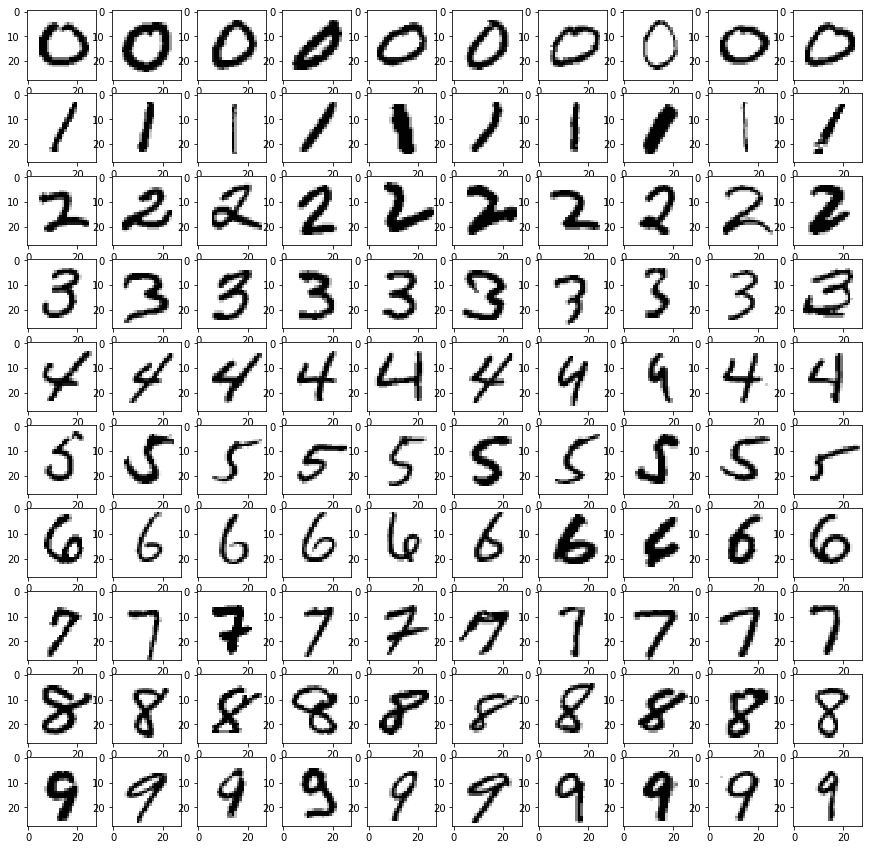

In [6]:
def P1(num_examples=10):
    plt.figure(figsize=(15, 15))
    plt.rc('image',cmap='binary') # changing color to BGW
    
    # For each digit, grab the first given number of examples and add them to the plot
    for feature in range(0,10):
        image_count = 0
        i = 0
        while(image_count < num_examples):
            if (Y[i] == float(feature)):
                plt.subplot(10, 10, feature * num_examples + image_count + 1)
                plt.imshow(X[i].reshape(28,28))
                image_count += 1
            i += 1

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [8]:
def P2(k_values):
    for k in k_values:
        #Train model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
       
        #Create list of predictions
        y_pred_list = []
        correct = 0
        for row in range(dev_data.shape[0]): # Make predictions and compare to true value
            pred = model.predict([dev_data[row]])
            y_pred_list.append(pred)
            correct += (pred == dev_labels[row])
        y_pred = np.array(y_pred_list)
        cl = ""
        
        # Only printing CL for k=1 for printing brevity -- matches problem statement
        if (k==1):
            cl = classification_report(dev_labels, y_pred)
            
            
        accuracy = correct/dev_labels.shape
        print("KNN: K = %i \n Accuracy = %f \n"%(k, accuracy), cl)
            
k_values = [1, 3, 5, 7, 9]
P2(k_values)

KNN: K = 1 
 Accuracy = 0.888000 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        99
         1.0       0.89      1.00      0.94       105
         2.0       0.99      0.79      0.88       102
         3.0       0.77      0.87      0.82        86
         4.0       0.89      0.82      0.85       104
         5.0       0.93      0.84      0.88        91
         6.0       0.94      0.96      0.95        98
         7.0       0.89      0.92      0.90       113
         8.0       0.94      0.88      0.91        96
         9.0       0.78      0.82      0.80       106

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

KNN: K = 3 
 Accuracy = 0.878000 
 
KNN: K = 5 
 Accuracy = 0.869000 
 
KNN: K = 7 
 Accuracy = 0.865000 
 
KNN: K = 9 
 Accuracy = 0.863000 
 


ANSWER: 3 is the most difficult for k-NN (k=1) to classify.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [9]:
def P3(train_sizes, accuracies):
    for size in train_sizes:
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data[:size], train_labels[:size]) #Train with different data sizes
        y_pred_list = []
        correct = 0
        start_time = time.time()
        for row in range(dev_data.shape[0]):
            pred = model.predict([dev_data[row]])
            y_pred_list.append(pred)
            correct += (pred == dev_labels[row])
        stop_time = time.time() - start_time    
        print("Took %.3f seconds to predict with %i examples"%(stop_time, size))
        accuracy = correct/dev_labels.shape
        accuracies.append(float(accuracy))
    
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Took 0.661 seconds to predict with 100 examples
Took 0.983 seconds to predict with 200 examples
Took 1.316 seconds to predict with 400 examples
Took 1.947 seconds to predict with 800 examples
Took 3.383 seconds to predict with 1600 examples
Took 6.111 seconds to predict with 3200 examples
Took 11.215 seconds to predict with 6400 examples
Took 21.933 seconds to predict with 12800 examples
Took 41.962 seconds to predict with 25000 examples


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [10]:
def P4():
    l = LinearRegression().fit(np.array(train_sizes).reshape(9,1), accuracies)
    print(l.predict([[60000]])[0]) #Predict with 60,000 and then remove the result from list
P4()

1.2430722603554991


ANSWER: The regression predicts an accuracy of 1.24 which makes no sense. Accuracy does not increase linearly as it cannot go above 1. using a $log$ transformation will fix this.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


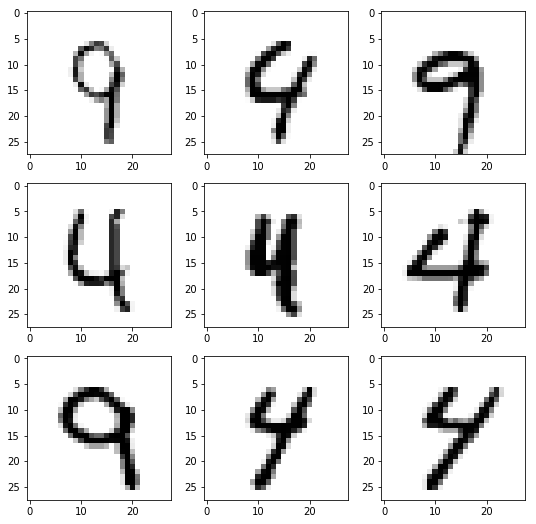

In [19]:
def P5():
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    y_pred_list = []
    for example in dev_data:
        pred = model.predict([example])
        y_pred_list.append(pred)
    cm = confusion_matrix(dev_labels, y_pred_list)
    print(cm)
    
    #Our model often confuses 9s and 4s, lets look at some examples:
    examples = []
    for i in range(len(y_pred_list)):
        if((y_pred_list[i] == 9) &(dev_labels[i] == 4)):
            examples.append(i)
        elif((y_pred_list[i] == 4) &(dev_labels[i] == 9)):
            examples.append(i)
            
    plt.figure(figsize=(9,9))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(dev_data[examples[i]].reshape(28,28))

        

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [11]:
# Created helper method for Gaussian blurring. 
# It loops through the rows, transforms each row, then adds a blurring element based on surround cells given by alpha
# returns copy of matrix that has been blurred
def simplified_gaussian_blurring(matrix, alpha=0): 
    copy = np.zeros(matrix.shape)
    for row in range(matrix.shape[0]):
        grid = matrix[row].reshape(28,28)
        T = np.empty([28,28])
        for x in range(28):
            for y in range(28):
                sum = 0
                for i in range(-1,2):
                    for j in range(-1,2):
                        if (i != 0 or j != 0):
                            if not (x + i < 0 or x + i > 27 or y + j < 0 or y + j > 27):
                                sum += grid[x + i][y + j]
                T[x][y] = (1 - alpha) * grid[x][y] + alpha * sum
        copy[row] = np.ravel(T)
    return copy

def P6():
    train_blur = simplified_gaussian_blurring(mini_train_data, alpha = .4)
    test_blur = simplified_gaussian_blurring(dev_data, alpha = .4)
    # Preprocess the training data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_blur, mini_train_labels)
    y_pred_list = []
    correct = 0
    for row in range(dev_data.shape[0]):
        pred = model.predict([dev_data[row]])
        y_pred_list.append(pred)
        correct += (pred == dev_labels[row])
    accuracy = correct/dev_labels.shape
    print(accuracy)
    
    # Preprocess both
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_blur, mini_train_labels)
    y_pred_list = []
    correct = 0
    for row in range(test_blur.shape[0]):
        pred = model.predict([test_blur[row]])
        y_pred_list.append(pred)
        correct += (pred == dev_labels[row])
    accuracy = correct/dev_labels.shape
    print(accuracy)
    
    # Preprocess the test data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    y_pred_list = []
    correct = 0
    for row in range(test_blur.shape[0]):
        pred = model.predict([test_blur[row]])
        y_pred_list.append(pred)
        correct += (pred == dev_labels[row])
    accuracy = correct/dev_labels.shape
    print(accuracy)
    

P6()



[0.156]
[0.901]
[0.809]


ANSWER: Processing both is by far the best, which makes sense... You are training a model to look for blurred numbers then using it on unprocessed data. The converse is similarly erroneous.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [12]:
def P7():
    clf = BernoulliNB(binarize=0.0) # Binarize turns vector into binary vector based on given treshold
    clf.fit(mini_train_data, mini_train_labels)
    y_pred_list =[]
    correct = 0
    for row in range(dev_data.shape[0]):
        pred = clf.predict([dev_data[row]])
        y_pred_list.append(pred)
        correct += (pred == dev_labels[row])
    accuracy = correct/dev_labels.shape
    print(accuracy)
    
    copy = np.zeros(mini_train_data.shape)
    for x in range(mini_train_data.shape[0]): # "Ternarizing" data based on thresholds 0 and .99
        for y in range(mini_train_data.shape[1]):
            if (mini_train_data[x][y] > .99):
                copy[x][y] = 2
            elif (mini_train_data[x][y] > 0):
                copy[x][y] = 1
    clf2 = MultinomialNB()
    clf2.fit(copy, mini_train_labels)
    y_pred_list =[]
    correct = 0
    for row in range(dev_data.shape[0]):
        pred = clf2.predict([dev_data[row]])
        y_pred_list.append(pred)
        correct += (pred == dev_labels[row])
    accuracy = correct/dev_labels.shape
    print(accuracy)
P7()

[0.815]
[0.795]


ANSWER: MNNB performs worse as it is adds way more possibilities to the features. Thus it gets worse estimations for P(feature|label). e.g. there are 2^784 possibilies vs 3^784.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [14]:
def P8(alphas):
    model_definition = BernoulliNB(binarize=0.0)
    best = GridSearchCV(model_definition, alphas)
    best.fit(mini_train_data, mini_train_labels)
    return best

alphas = {'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\cocunnin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cocunnin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\cocunnin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\cocunnin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\cocunnin\AppData\Local\C

In [15]:
print( nb.best_params_)

{'alpha': 0.1}


ANSWER: .826. I expected 0 to be the best because extreme probabilities are made less extreme with smoothing and in the mapping of numbers to a grid, there are areas of the grid that only map to one number, and these are critical to predicting these numbers.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [16]:
def P9():
    clf = GaussianNB()

    clf.fit(mini_train_data, mini_train_labels)
    y_pred_list =[]
    correct = 0
    for row in range(dev_data.shape[0]):
        pred = clf.predict([dev_data[row]])
        y_pred_list.append(pred)
        correct += (pred == dev_labels[row])
    accuracy = correct/dev_labels.shape
    print(accuracy)
    
    # Applying var-smoothing to get close to Bernoulli model
    clf = GaussianNB(var_smoothing=.1)
    clf.fit(mini_train_data, mini_train_labels)
    y_pred_list =[]
    correct = 0
    for row in range(dev_data.shape[0]):
        pred = clf.predict([dev_data[row]])
        y_pred_list.append(pred)
        correct += (pred == dev_labels[row])
    accuracy = correct/dev_labels.shape
    print(accuracy)

    
    
gnb = P9()

[0.621]
[0.791]


ANSWER: Adding var smoothing makes it close to the Bernoulli naive bayes accuracy. Var_smoothing changes the probability distribution of each feature by expanding the standard deviation. The standard deviation without the smoothing is too small to account for true variation in the digits. By spreading out the distribution we have a model that can more aptly predict the different digits. This value of `var_smooting=.1` was used because of a gridsearch run on this value.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

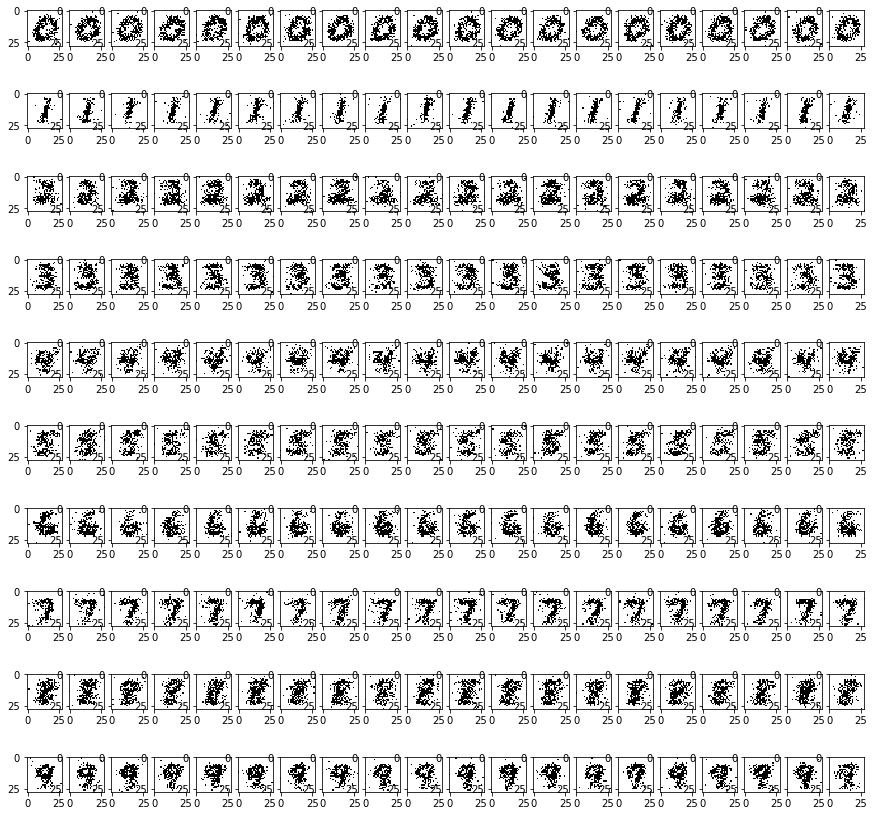

In [17]:

def P10(num_examples):
    plt.figure(figsize=(15,15))
    bNB = BernoulliNB(binarize=0.0)
    bNB.fit(mini_train_data, mini_train_labels)
    for digit in range(10):
        for ex in range(num_examples):   # prints out given number of random examples generated from our model.
            gen_digit = np.zeros((1,784))
            for i in range(784):
                prob = np.exp(bNB.feature_log_prob_[digit][i])
                ran = np.random.rand()
                if (ran < prob):        # comparing the random number to the probability of that given cell
                    gen_digit[0][i] = 1
            element = digit * num_examples + ex + 1
            plt.subplot(10, num_examples, element)
            plt.imshow(gen_digit.reshape(28,28))

P10(20)

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [18]:
# iterates through test data and checks the models probability of its prediction then buckets it into the given buckets.
# stores corrects and totals in given lists

def P11(buckets, correct, total):
    nb = BernoulliNB(alpha=0.1, binarize=.1)
    nb.fit(mini_train_data,mini_train_labels)
    for index in range(len(dev_data)): 
        predicted = nb.predict([dev_data[index]])
        probability = nb.predict_proba([dev_data[index]])[0][int(predicted)]
        for i in range(len(buckets)):
            if probability <= buckets[i]:
                total[i] += 1
                if predicted == dev_labels[index]:
                    correct[i] += 1
                break

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  35    accuracy = 0.343
p(pred) <= 0.9990000000000    total =  75    accuracy = 0.440
p(pred) <= 0.9999900000000    total =  71    accuracy = 0.521
p(pred) <= 0.9999999000000    total =  59    accuracy = 0.644
p(pred) <= 0.9999999990000    total =  49    accuracy = 0.755
p(pred) <= 0.9999999999900    total =  43    accuracy = 0.698
p(pred) <= 0.9999999999999    total =  61    accuracy = 0.803
p(pred) <= 1.0000000000000    total = 607    accuracy = 0.956


ANSWER: This NB model is weakly calibrated. This is due to the overconfidence of Naive Bayes.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [21]:
def p11():
    l = """
    I attemped to create a zoom function that removes superfluous features and only focuses on the center of the image. 
    I also attempted to create a functions that counts rows and/or columns that have zero totals.
    None of these significantly changed the accuracy. Unfortunately, I was unable to improve this model and had to stop 
    due to time constraints.
    """

p11()